# Introduction

In this homework, you'll be required to load in a dataset which has about 500 features. By using Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best $R^2$. Then we'll plot the results.

Recall we minimize the following on training data: $(x_i,y_i)$
$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$

Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on testing data: $(x_j,y_j)$
$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$

# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

In [1]:
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import re

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import numpy.random as nprnd
import random
import json

pd.set_option('display.max_columns', 500)
df = pd.read_csv('hw2data.csv')

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
y = df['y']
X = df.drop('y',axis=1)
size = len(df)
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

In [3]:
# Create linear regression object
alphas = np.logspace(-8,-3,100)
from sklearn.linear_model import Lasso
scores = []
for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
  

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Residual sum of squares: 0.00
Variance score: 1.00
Optimal regularization parameter : 0.000792482898354


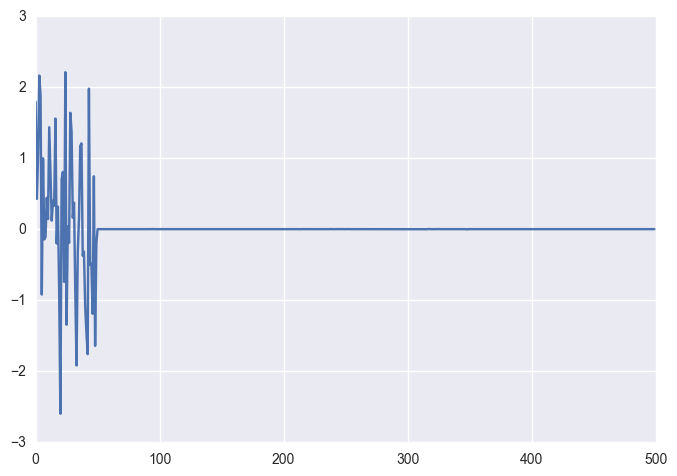

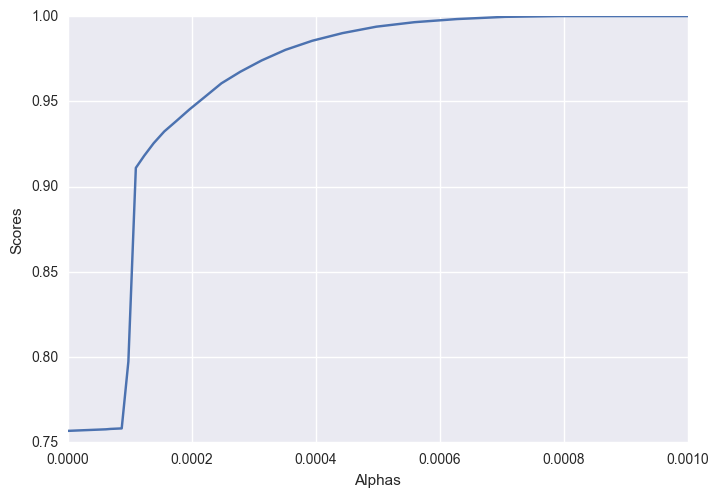

In [4]:
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
plt.plot(regr.coef_)
plt.figure()
plt.plot(alphas, scores)
plt.xlabel('Alphas')
plt.ylabel('Scores')

best_alpha=alphas[np.argmax(scores)]
alpha_optim = best_alpha
print("Optimal regularization parameter : %s" % alpha_optim)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


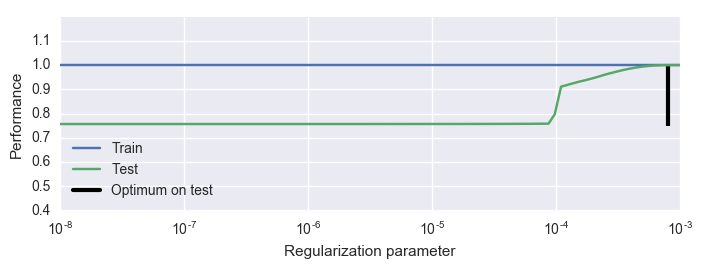

In [24]:
plt.subplot(2, 1, 1)
alphas = np.logspace(-8,-3,100)

# Fill these in
train_errors = list()
test_errors = list()
alpha_optim = best_alpha
coef = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(X_train, y_train)

    train_errors.append(regr.score(X_train, y_train))
    test_errors.append(regr.score(X_test, y_test))


plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0.4, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

<Container object of 500 artists>

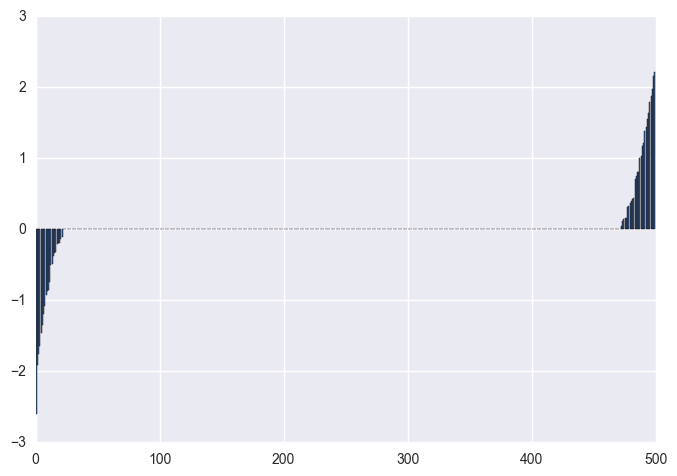

In [22]:
y = df['y']
X = df.drop('y',axis=1)
coef_ = np.sort(np.array(regr.coef_))
plt.bar(X.columns.values, coef_)

There are a number of zeros in the coeffecients when using lasso regression because of the way the level sets are formed. Since it is not a smooth norm like ridge reression, the effects are abruptly transferred to the coeffecients.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[ 0.99946092  0.99999745  0.99999779  0.99999557  0.99999244]


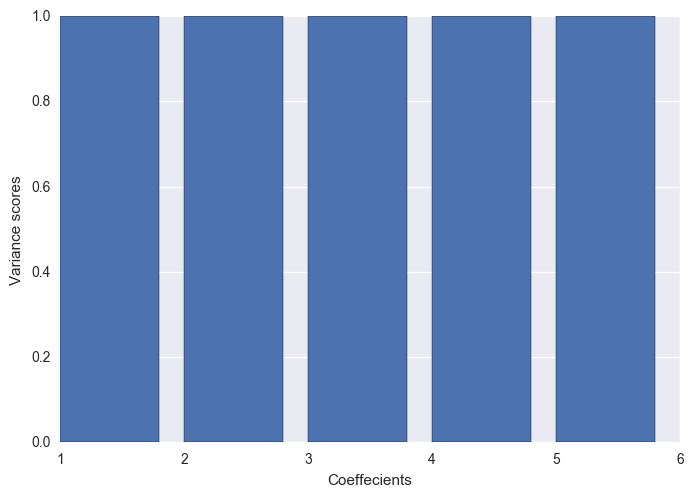

In [16]:
from sklearn import datasets
import scipy
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
n_folds = 5
regr = Lasso(alpha = best_alpha)
this_scores = cross_val_score(regr, X, y, cv=n_folds, n_jobs=1)
print(this_scores)
#plt.plot(this_scores)
plt.show()
plt.bar(range(1,6), this_scores)
plt.xlabel('Coeffecients')
plt.ylabel('Variance scores')

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[ 0.99999785  0.99606389  0.99910009  0.99999832  0.99750732]


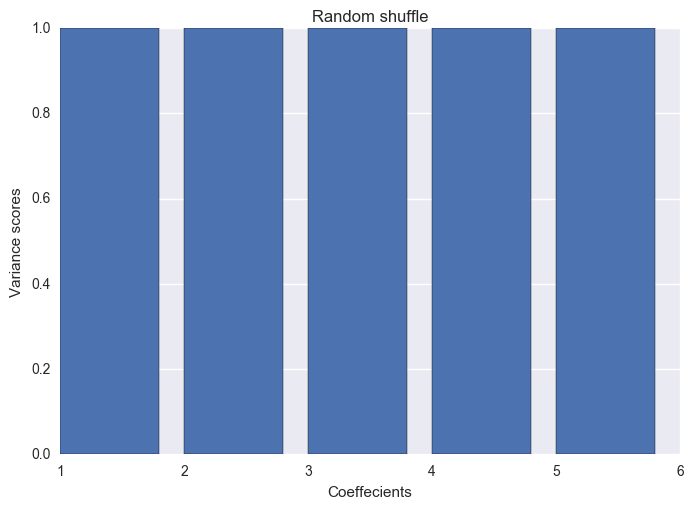

In [18]:
#Using random set
shuffle = ShuffleSplit(n_splits=5, test_size=0.2)
newscore = cross_val_score(regr, X, y, cv=shuffle, n_jobs=1)
print(newscore)
plt.bar(range(1,6), this_scores)
plt.xlabel('Coeffecients')
plt.ylabel('Variance scores')
plt.title('Random shuffle')

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [31]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs

y = df['y']
X = df.drop('y',axis=1)

scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=best_alpha)

G:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [32]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

G:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


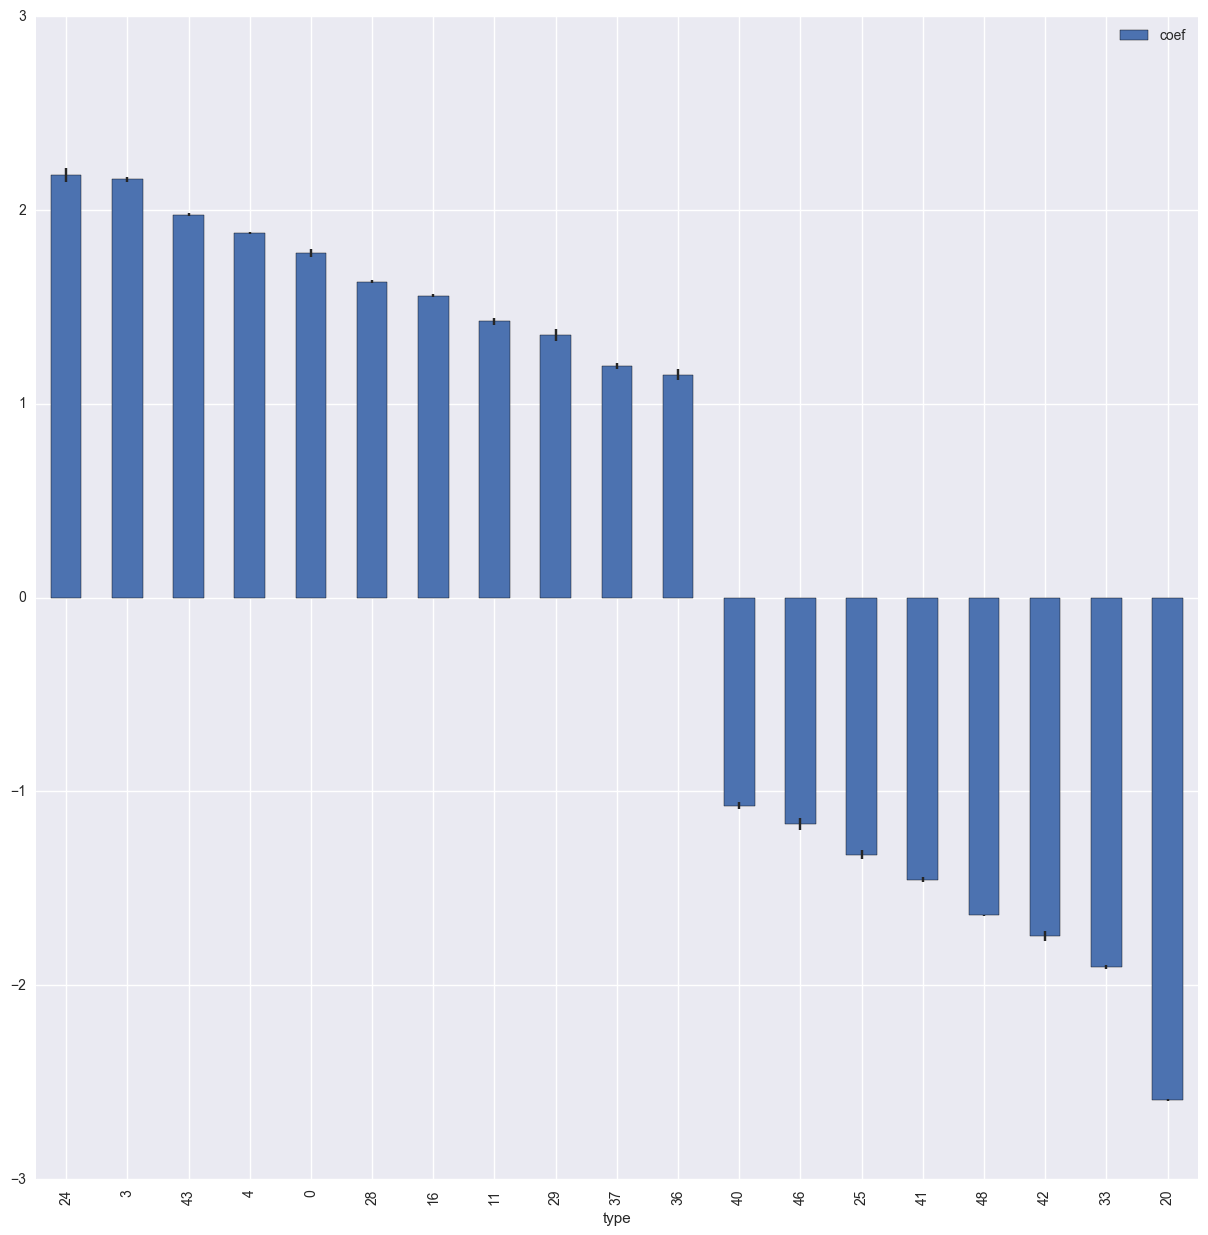

In [33]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))